In [9]:
## Import modules & Load Dataset
import pandas as pd
# 매출 데이터 load
mamm_sales = pd.read_csv("../../../resources/extractedData/매머드_매장별 시간대별 평균매출.csv", index_col =False)

In [10]:
mamm_sales

,매장코드_영업일자_시간대,매장코드,매장명,영업일자,시간대,매출
0,S53661_2019-02-01_1,S53661,MMTH 역삼점,2019-02-01,1.0,37033.33
1,S53661_2019-02-01_2,S53661,MMTH 역삼점,2019-02-01,2.0,42600.00
2,S53661_2019-02-01_3,S53661,MMTH 역삼점,2019-02-01,3.0,17400.00
3,S53661_2019-02-07_1,S53661,MMTH 역삼점,2019-02-07,1.0,63225.00
4,S53661_2019-02-07_2,S53661,MMTH 역삼점,2019-02-07,2.0,34325.00
...,...,...,...,...,...,...
1426,T64222_2019-02-27_4,T64222,MMTH 역삼GFC점,2019-02-27,4.0,45325.00
1427,T64222_2019-02-28_1,T64222,MMTH 역삼GFC점,2019-02-28,1.0,70550.00
1428,T64222_2019-02-28_2,T64222,MMTH 역삼GFC점,2019-02-28,2.0,225000.00
1429,T64222_2019-02-28_3,T64222,MMTH 역삼GFC점,2019-02-28,3.0,83375.00


In [60]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

def clustering(data, col):
    # 결과 저장할 컬럼명 지정
    result = col+"_cl"
    
    scaled_Data = MinMaxScaler().fit_transform(data[col].values.reshape(-1,1))
    # kElbow cluster 진행
    Kelbow_model = KMeans(random_state=10)
    visualizer = KElbowVisualizer(Kelbow_model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: "+col)
    visualizer.fit(scaled_Data)
    visualizer.show()
    
    # 최적 k로 다시 진행
    optimal_k = visualizer.elbow_value_
    
    # 모델 선언
    optimal_model = KMeans(n_clusters = optimal_k, random_state=10)
    import matplotlib.pyplot as plt
    # 데이터에 학습 
    optimal_model.fit(scaled_Data)
    
    # 결과 저장
    data[result] = optimal_model.fit_predict(scaled_Data)
    
    # 산점도
    plt.scatter(data[result]+1, data[col])
    plt.title('강남구 매머드커피 '+ col+ ' 군집별 동향', fontsize=15)
    #plt.xlabel("sepal_length")
    plt.ylabel(col)
    plt.xlabel("군집")
    plt.show()

    # boxplot
    c1 = data[data[result]== 0][col].to_list()
    c2 = data[data[result]== 1][col].to_list()
    c3 = data[data[result] == 2][col].to_list()

    value = [c1, c2, c3]
    plt.boxplot(value) # vert: 가로/세로 상자그림
    plt.title('강남구 매머드커피 '+ col+ ' 군집별 동향', fontsize=15)
    plt.show()

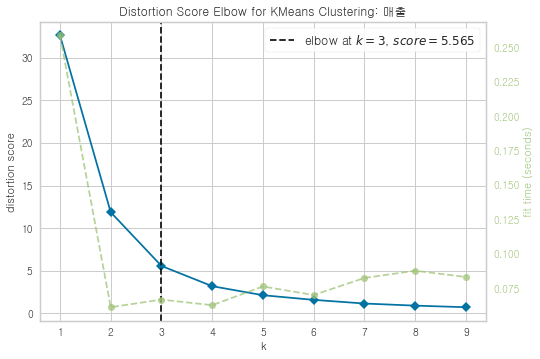

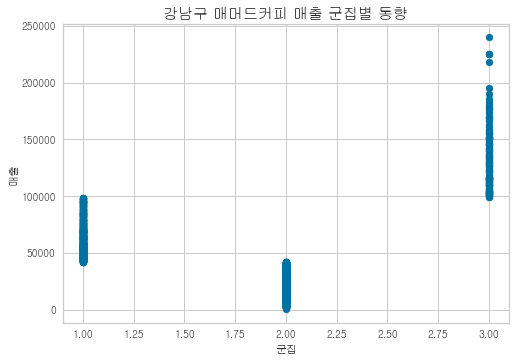

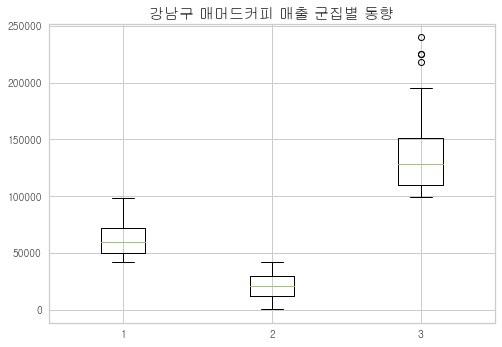

In [61]:
clustering(mamm_sales,"매출")

In [54]:
mamm_sales

,매장코드_영업일자_시간대,매장코드,매장명,영업일자,시간대,매출,매출_cl
0,S53661_2019-02-01_1,S53661,MMTH 역삼점,2019-02-01,1.0,37033.33,1
1,S53661_2019-02-01_2,S53661,MMTH 역삼점,2019-02-01,2.0,42600.00,0
2,S53661_2019-02-01_3,S53661,MMTH 역삼점,2019-02-01,3.0,17400.00,1
3,S53661_2019-02-07_1,S53661,MMTH 역삼점,2019-02-07,1.0,63225.00,0
4,S53661_2019-02-07_2,S53661,MMTH 역삼점,2019-02-07,2.0,34325.00,1
...,...,...,...,...,...,...,...
1426,T64222_2019-02-27_4,T64222,MMTH 역삼GFC점,2019-02-27,4.0,45325.00,0
1427,T64222_2019-02-28_1,T64222,MMTH 역삼GFC점,2019-02-28,1.0,70550.00,0
1428,T64222_2019-02-28_2,T64222,MMTH 역삼GFC점,2019-02-28,2.0,225000.00,2
1429,T64222_2019-02-28_3,T64222,MMTH 역삼GFC점,2019-02-28,3.0,83375.00,0
